# In this notebook, We are focusing more on actual detailed analysis in SV flanks

Short INS | Motif: APR | Correlation: 0.57
Short INS | Motif: DR | Correlation: 0.70
Short INS | Motif: IR | Correlation: -0.53
Short INS | Motif: MR | Correlation: 0.25
Short INS | Motif: Z | Correlation: 0.63
Short DEL | Motif: APR | Correlation: 0.50
Short DEL | Motif: DR | Correlation: 0.67
Short DEL | Motif: IR | Correlation: -0.53
Short DEL | Motif: MR | Correlation: 0.13
Short DEL | Motif: Z | Correlation: -0.36
Medium INS | Motif: APR | Correlation: 0.65
Medium INS | Motif: DR | Correlation: 0.24
Medium INS | Motif: IR | Correlation: 0.20
Medium INS | Motif: MR | Correlation: -0.67
Medium INS | Motif: Z | Correlation: 0.35
Medium DEL | Motif: APR | Correlation: 0.80
Medium DEL | Motif: DR | Correlation: 0.48
Medium DEL | Motif: IR | Correlation: 0.25
Medium DEL | Motif: MR | Correlation: -0.48
Medium DEL | Motif: Z | Correlation: -0.19
Long INS | Motif: APR | Correlation: 0.22
Long INS | Motif: DR | Correlation: 0.43
Long INS | Motif: IR | Correlation: -0.32
Long INS | Motif: M

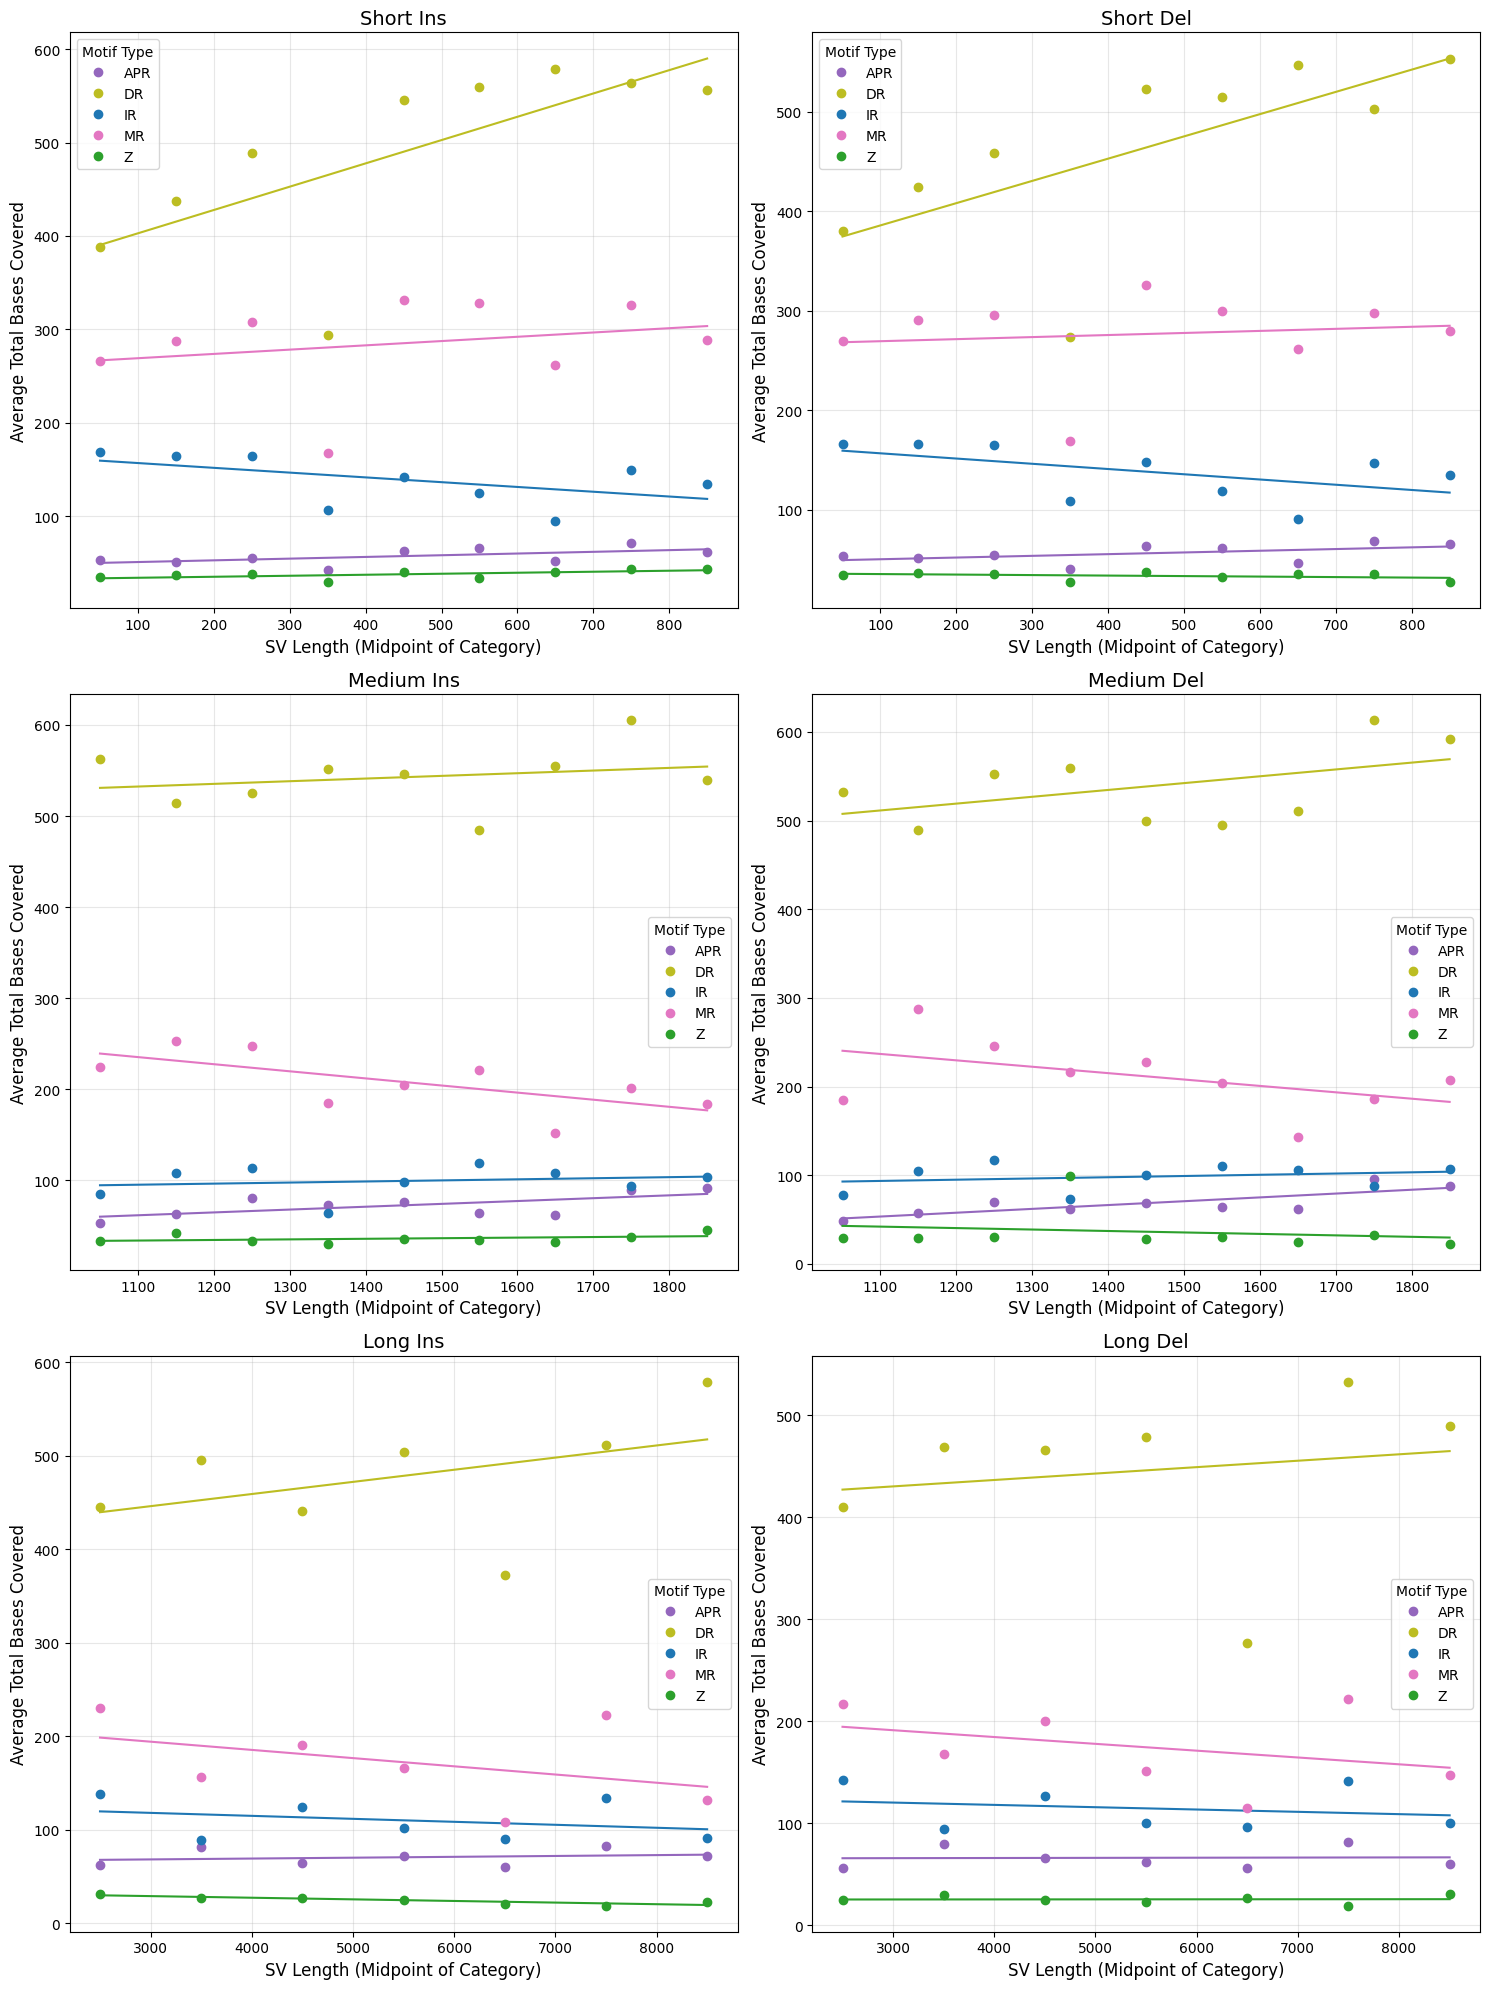

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Use vectorized string operations to extract SV Length and SV Type
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Filter out rows with missing SV length, type, or 'Total Bases Covered' less than 1 or greater than 2000
df = df.dropna(subset=['SV_Length', 'SV_Type'])
df = df[(df['Total Bases Covered'] >= 1) & (df['Total Bases Covered'] <= 2000)]

# Define bins for short, medium, and long SVs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for motifs
unique_motifs = df['Motif Type'].unique()
color_map = colormaps['tab10']
motif_colors = {motif: color_map(i / len(unique_motifs)) for i, motif in enumerate(unique_motifs)}

# Function to create scatter plot and regression line for given data and bins
def plot_sv_length_vs_base_coverage(ax, data, bins, sv_category, sv_type):
    for motif, motif_data in data.groupby('Motif Type'):
        # Bin the data
        motif_data['SV_Length_Category'] = pd.cut(motif_data['SV_Length'], bins=bins, right=False)
        avg_base_coverage = motif_data.groupby('SV_Length_Category', observed=True)['Total Bases Covered'].mean().reset_index()

        # Calculate bin midpoints
        bin_intervals = avg_base_coverage['SV_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        avg_base_coverage['SV_Length_Midpoint'] = bin_midpoints[:len(avg_base_coverage)]

        # Plot the data
        color = motif_colors[motif]
        ax.plot(avg_base_coverage['SV_Length_Midpoint'], avg_base_coverage['Total Bases Covered'], label=motif, marker='o', linestyle='', color=color)

        # Calculate regression line and correlation
        if len(avg_base_coverage.dropna()) > 1:
            m, b = np.polyfit(avg_base_coverage['SV_Length_Midpoint'], avg_base_coverage['Total Bases Covered'], 1)
            ax.plot(avg_base_coverage['SV_Length_Midpoint'], m * np.array(avg_base_coverage['SV_Length_Midpoint']) + b, color=color)
            corr = np.corrcoef(avg_base_coverage['SV_Length_Midpoint'], avg_base_coverage['Total Bases Covered'])[0, 1]
            print(f"{sv_category} {sv_type} | Motif: {motif} | Correlation: {corr:.2f}")

    # Add title and labels
    ax.set_title(f'{sv_category.capitalize()} {sv_type.capitalize()}', fontsize=14)
    ax.set_xlabel('SV Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Average Total Bases Covered', fontsize=12)
    ax.legend(title='Motif Type', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Filter data for each category and plot
categories = [
    ('Short', 'INS', bins_short),
    ('Short', 'DEL', bins_short),
    ('Medium', 'INS', bins_medium),
    ('Medium', 'DEL', bins_medium),
    ('Long', 'INS', bins_long),
    ('Long', 'DEL', bins_long),
]

for ax, (sv_category, sv_type, bins) in zip(axes, categories):
    category_data = df[df['SV_Type'] == sv_type]
    if sv_category == 'Short':
        category_data = category_data[category_data['SV_Length'] < 1000]
    elif sv_category == 'Medium':
        category_data = category_data[(category_data['SV_Length'] >= 1000) & (category_data['SV_Length'] < 2000)]
    elif sv_category == 'Long':
        category_data = category_data[category_data['SV_Length'] >= 2000]

    plot_sv_length_vs_base_coverage(ax, category_data, bins, sv_category, sv_type)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Short INS | Motif: APR | Correlation: 0.67
Short INS | Motif: DR | Correlation: 0.76
Short INS | Motif: IR | Correlation: -0.62
Short INS | Motif: MR | Correlation: -0.05
Short INS | Motif: Z | Correlation: 0.68
Short DEL | Motif: APR | Correlation: 0.66
Short DEL | Motif: DR | Correlation: 0.75
Short DEL | Motif: IR | Correlation: -0.59
Short DEL | Motif: MR | Correlation: -0.09
Short DEL | Motif: Z | Correlation: 0.55
Medium INS | Motif: APR | Correlation: 0.19
Medium INS | Motif: DR | Correlation: 0.49
Medium INS | Motif: IR | Correlation: 0.22
Medium INS | Motif: MR | Correlation: -0.21
Medium INS | Motif: Z | Correlation: 0.29
Medium DEL | Motif: APR | Correlation: 0.77
Medium DEL | Motif: DR | Correlation: 0.53
Medium DEL | Motif: IR | Correlation: 0.34
Medium DEL | Motif: MR | Correlation: -0.23
Medium DEL | Motif: Z | Correlation: -0.35
Long INS | Motif: APR | Correlation: 0.29
Long INS | Motif: DR | Correlation: 0.38
Long INS | Motif: IR | Correlation: 0.25
Long INS | Motif: M

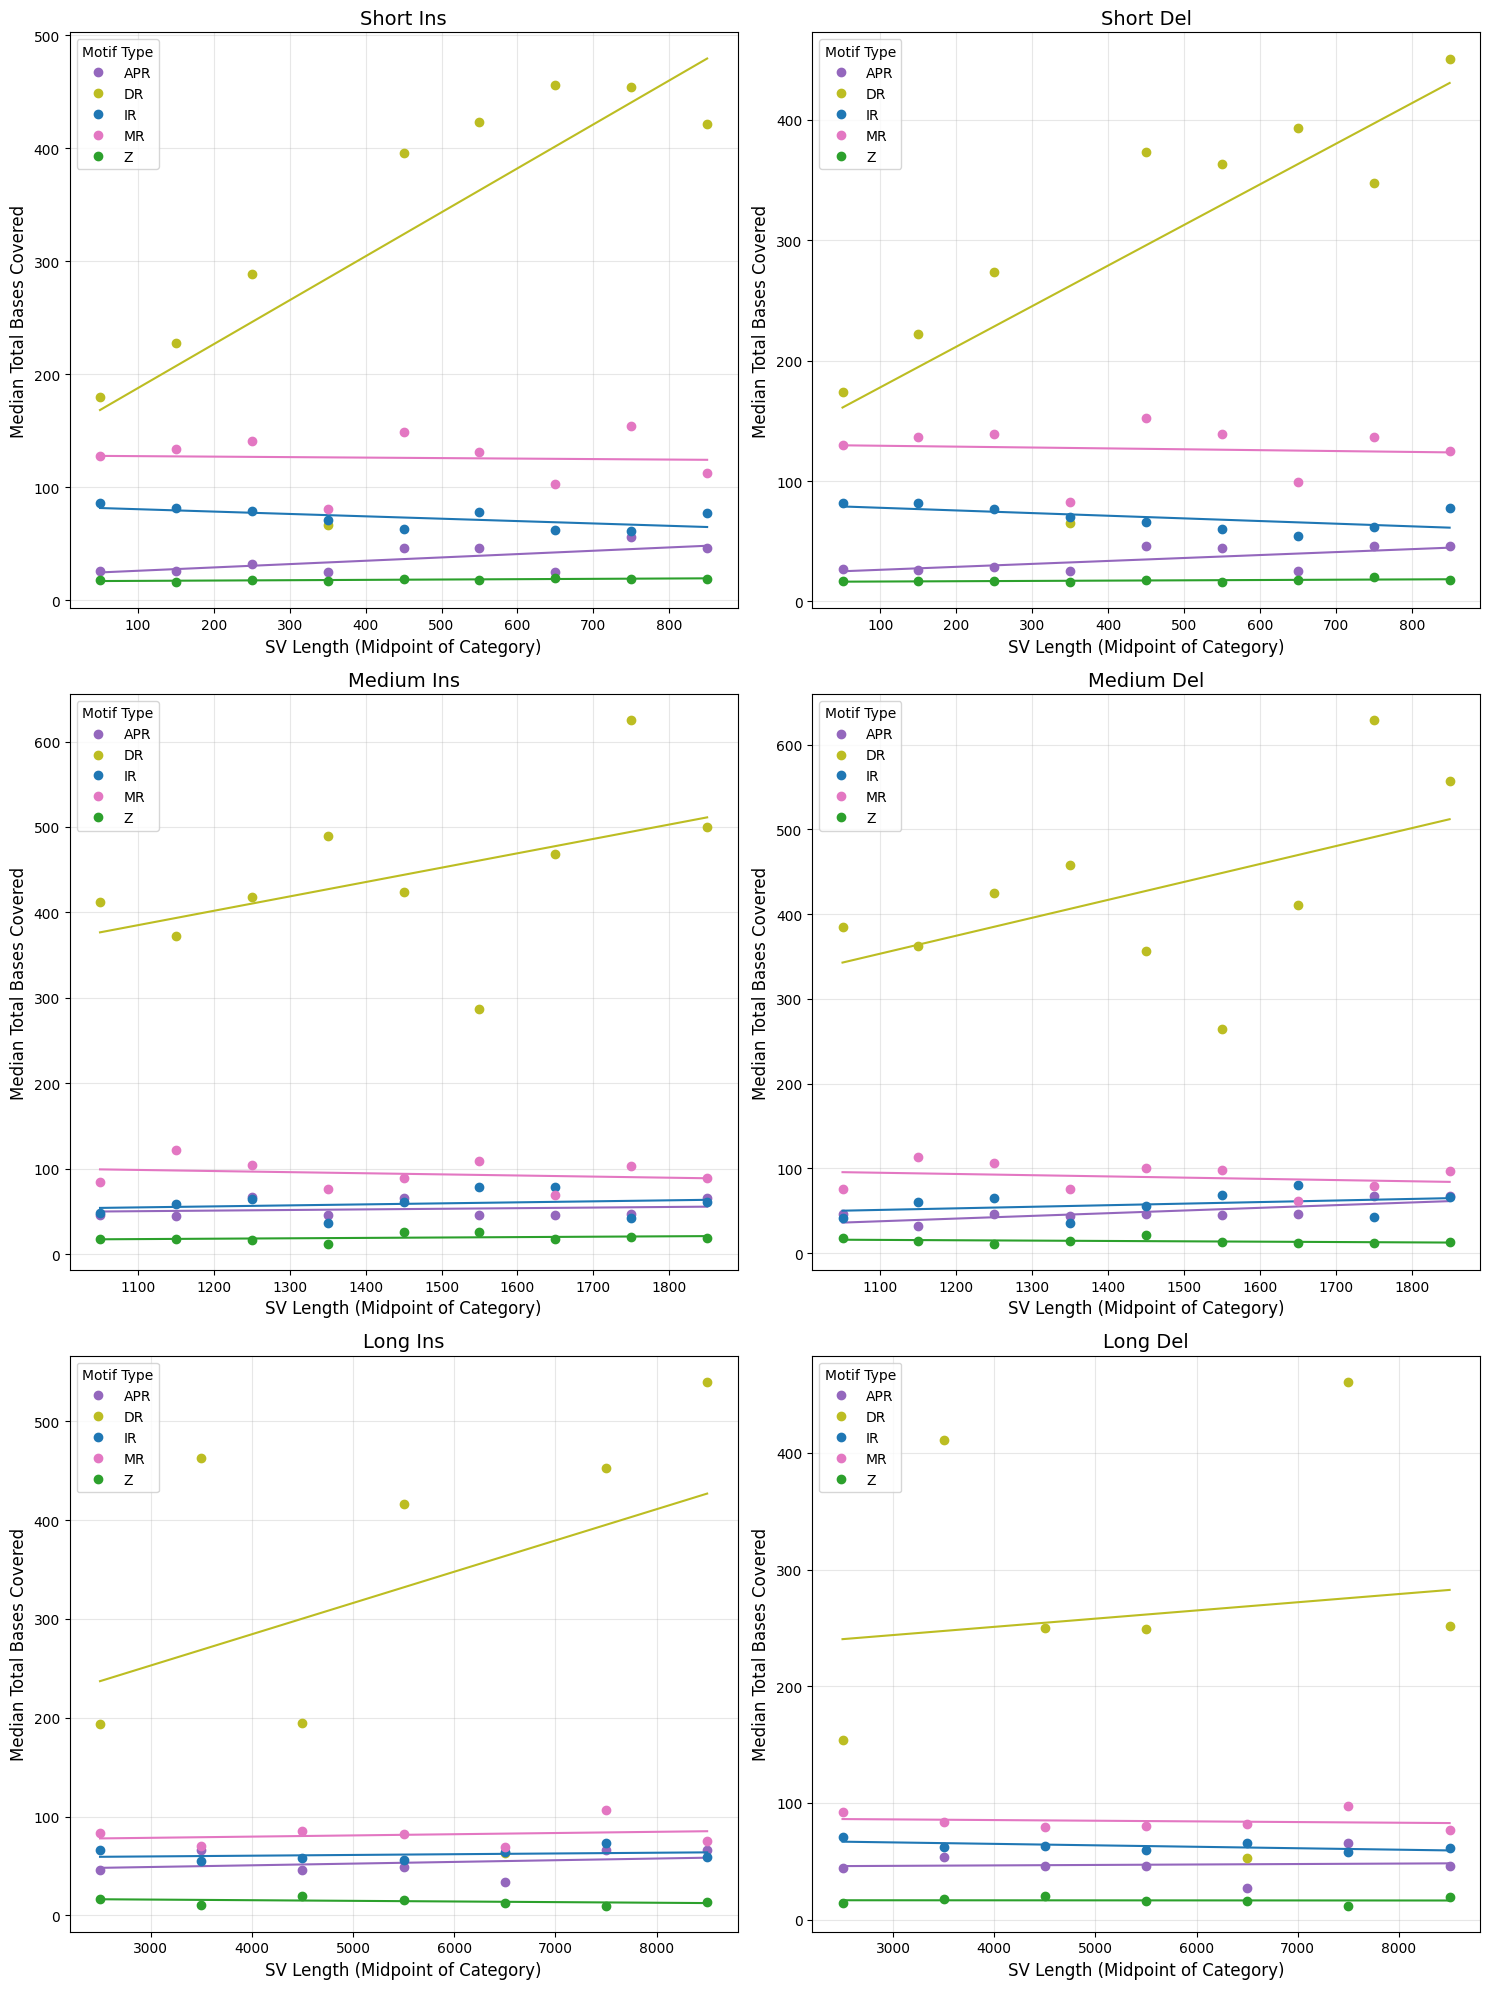

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Use vectorized string operations to extract SV Length and SV Type
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Filter out rows with missing SV length, type, or 'Total Bases Covered' less than 1 or greater than 2000
df = df.dropna(subset=['SV_Length', 'SV_Type'])
df = df[(df['Total Bases Covered'] >= 1) & (df['Total Bases Covered'] <= 2000)]

# Define bins for short, medium, and long SVs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for motifs
unique_motifs = df['Motif Type'].unique()
color_map = colormaps['tab10']
motif_colors = {motif: color_map(i / len(unique_motifs)) for i, motif in enumerate(unique_motifs)}

# Function to create scatter plot and regression line for given data and bins
def plot_sv_length_vs_base_coverage(ax, data, bins, sv_category, sv_type):
    for motif, motif_data in data.groupby('Motif Type'):
        # Bin the data
        motif_data['SV_Length_Category'] = pd.cut(motif_data['SV_Length'], bins=bins, right=False)
        median_base_coverage = motif_data.groupby('SV_Length_Category', observed=True)['Total Bases Covered'].median().reset_index()

        # Calculate bin midpoints
        bin_intervals = median_base_coverage['SV_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        median_base_coverage['SV_Length_Midpoint'] = bin_midpoints[:len(median_base_coverage)]

        # Plot the data
        color = motif_colors[motif]
        ax.plot(median_base_coverage['SV_Length_Midpoint'], median_base_coverage['Total Bases Covered'], label=motif, marker='o', linestyle='', color=color)

        # Calculate regression line and correlation
        if len(median_base_coverage.dropna()) > 1:
            m, b = np.polyfit(median_base_coverage['SV_Length_Midpoint'], median_base_coverage['Total Bases Covered'], 1)
            ax.plot(median_base_coverage['SV_Length_Midpoint'], m * np.array(median_base_coverage['SV_Length_Midpoint']) + b, color=color)
            corr = np.corrcoef(median_base_coverage['SV_Length_Midpoint'], median_base_coverage['Total Bases Covered'])[0, 1]
            print(f"{sv_category} {sv_type} | Motif: {motif} | Correlation: {corr:.2f}")

    # Add title and labels
    ax.set_title(f'{sv_category.capitalize()} {sv_type.capitalize()}', fontsize=14)
    ax.set_xlabel('SV Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Median Total Bases Covered', fontsize=12)
    ax.legend(title='Motif Type', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Filter data for each category and plot
categories = [
    ('Short', 'INS', bins_short),
    ('Short', 'DEL', bins_short),
    ('Medium', 'INS', bins_medium),
    ('Medium', 'DEL', bins_medium),
    ('Long', 'INS', bins_long),
    ('Long', 'DEL', bins_long),
]

for ax, (sv_category, sv_type, bins) in zip(axes, categories):
    category_data = df[df['SV_Type'] == sv_type]
    if sv_category == 'Short':
        category_data = category_data[category_data['SV_Length'] < 1000]
    elif sv_category == 'Medium':
        category_data = category_data[(category_data['SV_Length'] >= 1000) & (category_data['SV_Length'] < 2000)]
    elif sv_category == 'Long':
        category_data = category_data[category_data['SV_Length'] >= 2000]

    plot_sv_length_vs_base_coverage(ax, category_data, bins, sv_category, sv_type)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Short INS | Motif: APR | Correlation: 0.58
Short INS | Motif: DR | Correlation: 0.83
Short INS | Motif: IR | Correlation: -0.11
Short INS | Motif: MR | Correlation: 0.04
Short INS | Motif: Z | Correlation: 0.70
Short DEL | Motif: APR | Correlation: 0.53
Short DEL | Motif: DR | Correlation: 0.80
Short DEL | Motif: IR | Correlation: -0.01
Short DEL | Motif: MR | Correlation: 0.09
Short DEL | Motif: Z | Correlation: -0.30
Medium INS | Motif: APR | Correlation: 0.65
Medium INS | Motif: DR | Correlation: 0.68
Medium INS | Motif: IR | Correlation: 0.39
Medium INS | Motif: MR | Correlation: -0.23
Medium INS | Motif: Z | Correlation: 0.16
Medium DEL | Motif: APR | Correlation: 0.79
Medium DEL | Motif: DR | Correlation: 0.73
Medium DEL | Motif: IR | Correlation: 0.47
Medium DEL | Motif: MR | Correlation: -0.19
Medium DEL | Motif: Z | Correlation: -0.17
Long INS | Motif: APR | Correlation: 0.21
Long INS | Motif: DR | Correlation: 0.59
Long INS | Motif: IR | Correlation: -0.28
Long INS | Motif: M

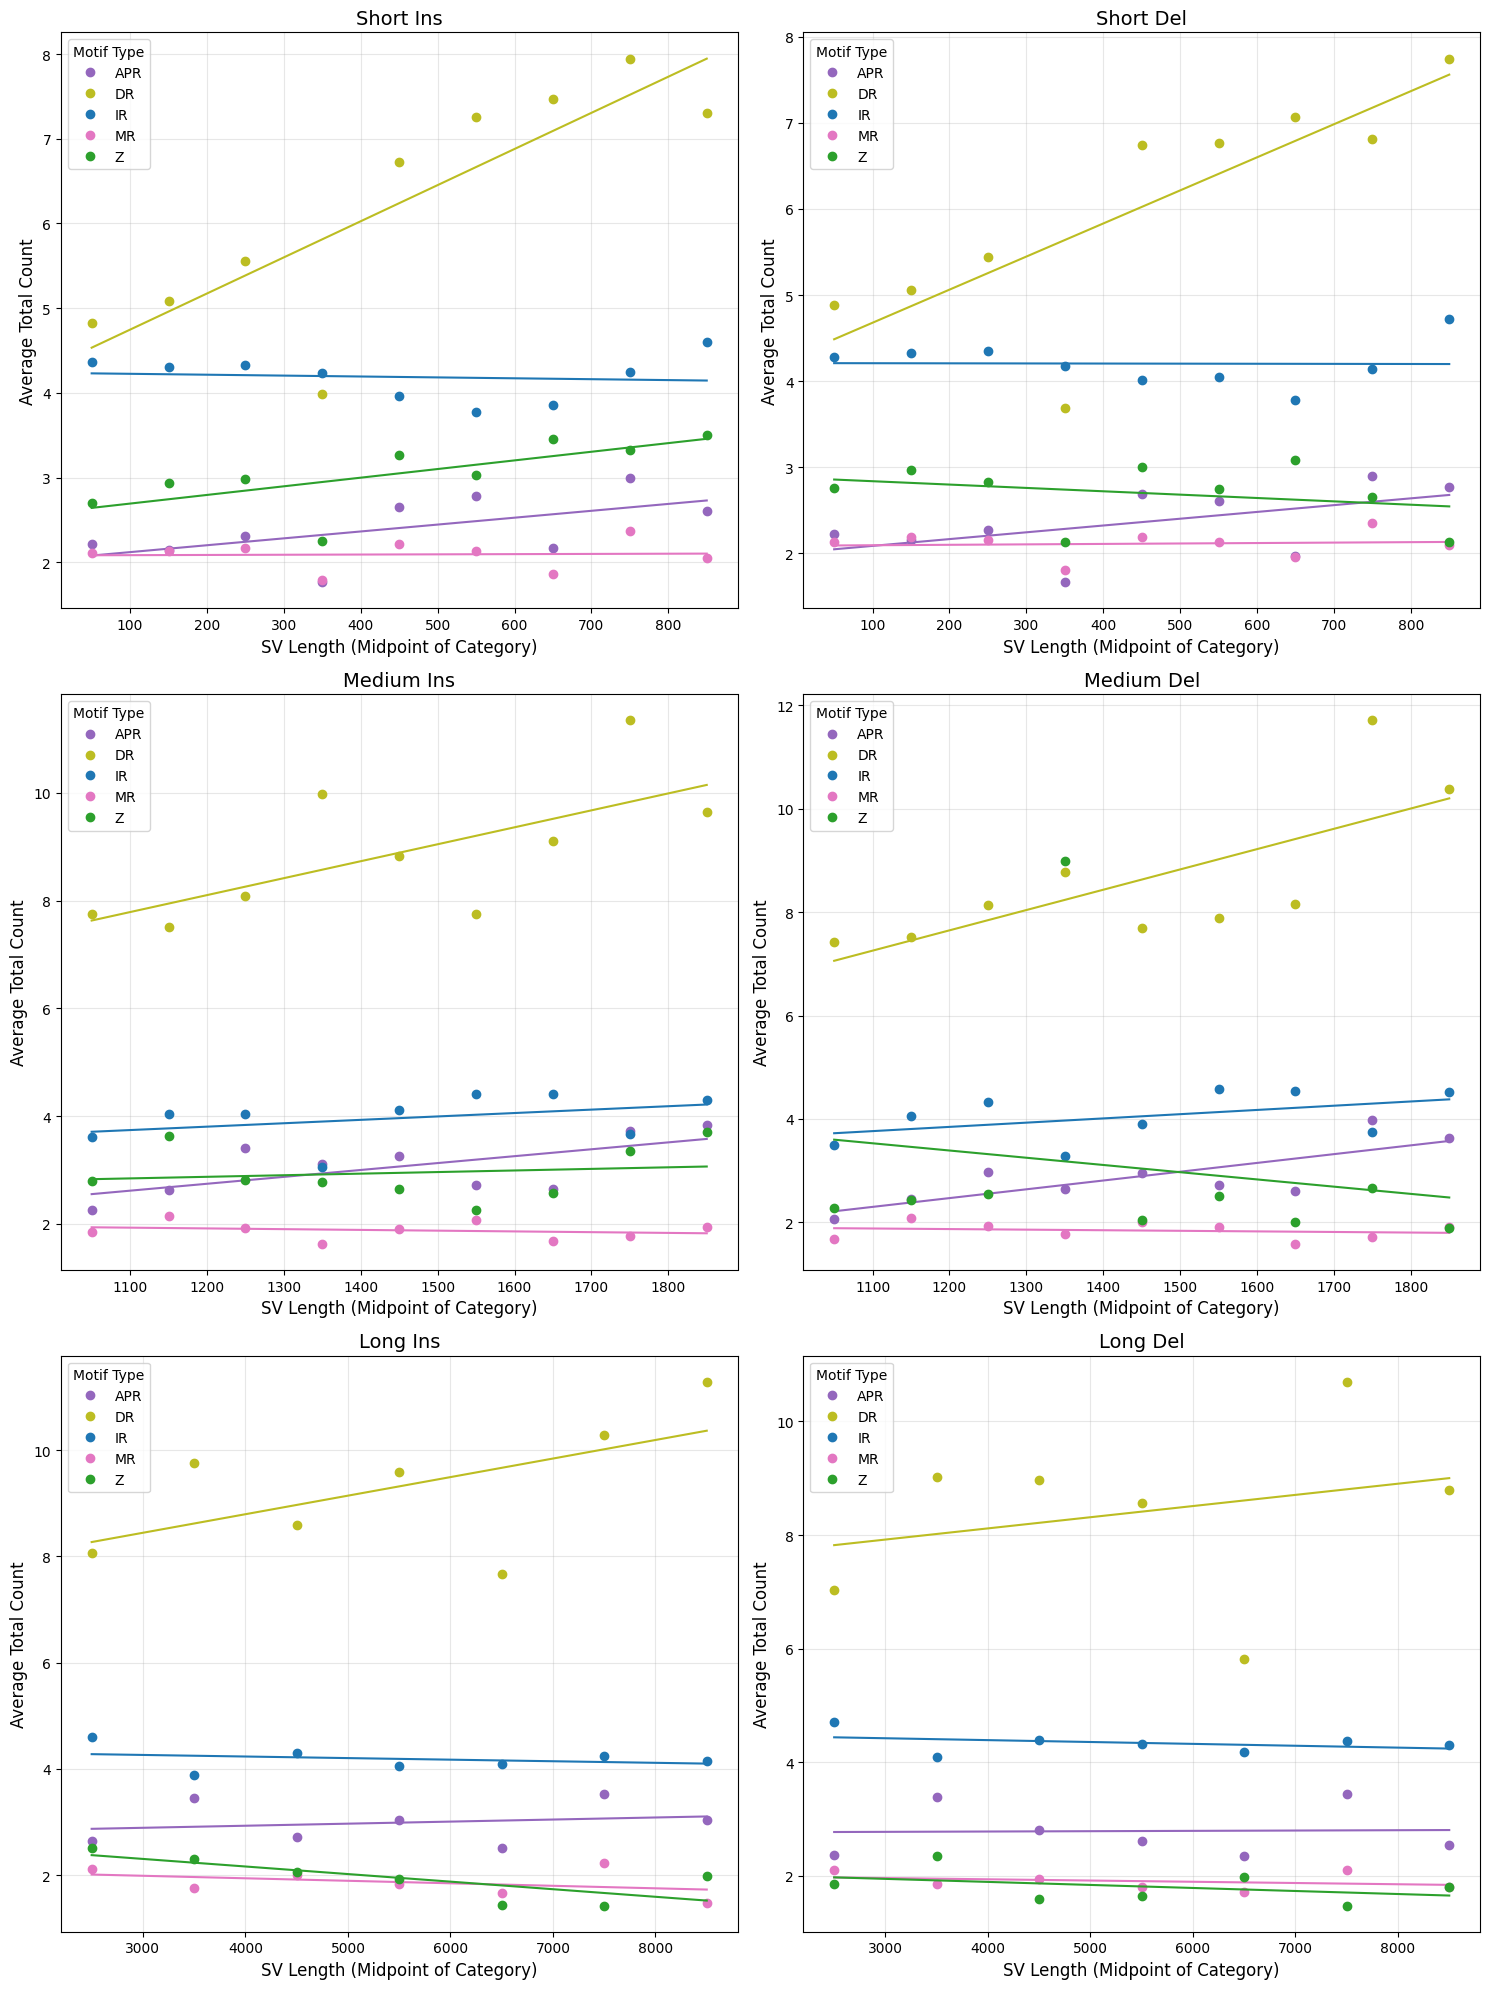

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Use vectorized string operations to extract SV Length and SV Type
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Filter out rows with missing SV length, type, or 'Total Count' less than 1
df = df.dropna(subset=['SV_Length', 'SV_Type'])
df = df[df['Total Count'] >= 1]

# Define bins for short, medium, and long SVs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for motifs
unique_motifs = df['Motif Type'].unique()
color_map = colormaps['tab10']
motif_colors = {motif: color_map(i / len(unique_motifs)) for i, motif in enumerate(unique_motifs)}

# Function to create scatter plot and regression line for given data and bins
def plot_sv_length_vs_total_count(ax, data, bins, sv_category, sv_type):
    for motif, motif_data in data.groupby('Motif Type'):
        # Bin the data
        motif_data['SV_Length_Category'] = pd.cut(motif_data['SV_Length'], bins=bins, right=False)
        avg_total_count = motif_data.groupby('SV_Length_Category', observed=True)['Total Count'].mean().reset_index()

        # Calculate bin midpoints
        bin_intervals = avg_total_count['SV_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        avg_total_count['SV_Length_Midpoint'] = bin_midpoints[:len(avg_total_count)]

        # Plot the data
        color = motif_colors[motif]
        ax.plot(avg_total_count['SV_Length_Midpoint'], avg_total_count['Total Count'], label=motif, marker='o', linestyle='', color=color)

        # Calculate regression line and correlation
        if len(avg_total_count.dropna()) > 1:
            m, b = np.polyfit(avg_total_count['SV_Length_Midpoint'], avg_total_count['Total Count'], 1)
            ax.plot(avg_total_count['SV_Length_Midpoint'], m * np.array(avg_total_count['SV_Length_Midpoint']) + b, color=color)
            corr = np.corrcoef(avg_total_count['SV_Length_Midpoint'], avg_total_count['Total Count'])[0, 1]
            print(f"{sv_category} {sv_type} | Motif: {motif} | Correlation: {corr:.2f}")

    # Add title and labels
    ax.set_title(f'{sv_category.capitalize()} {sv_type.capitalize()}', fontsize=14)
    ax.set_xlabel('SV Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Average Total Count', fontsize=12)
    ax.legend(title='Motif Type', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Filter data for each category and plot
categories = [
    ('Short', 'INS', bins_short),
    ('Short', 'DEL', bins_short),
    ('Medium', 'INS', bins_medium),
    ('Medium', 'DEL', bins_medium),
    ('Long', 'INS', bins_long),
    ('Long', 'DEL', bins_long),
]

for ax, (sv_category, sv_type, bins) in zip(axes, categories):
    category_data = df[df['SV_Type'] == sv_type]
    if sv_category == 'Short':
        category_data = category_data[category_data['SV_Length'] < 1000]
    elif sv_category == 'Medium':
        category_data = category_data[(category_data['SV_Length'] >= 1000) & (category_data['SV_Length'] < 2000)]
    elif sv_category == 'Long':
        category_data = category_data[category_data['SV_Length'] >= 2000]

    plot_sv_length_vs_total_count(ax, category_data, bins, sv_category, sv_type)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Analyzing data for Motif Type: IR

Significance values for INS (Motif Type: IR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 0.00e+00
Medium vs Long: adjusted p-value = 6.62e-145


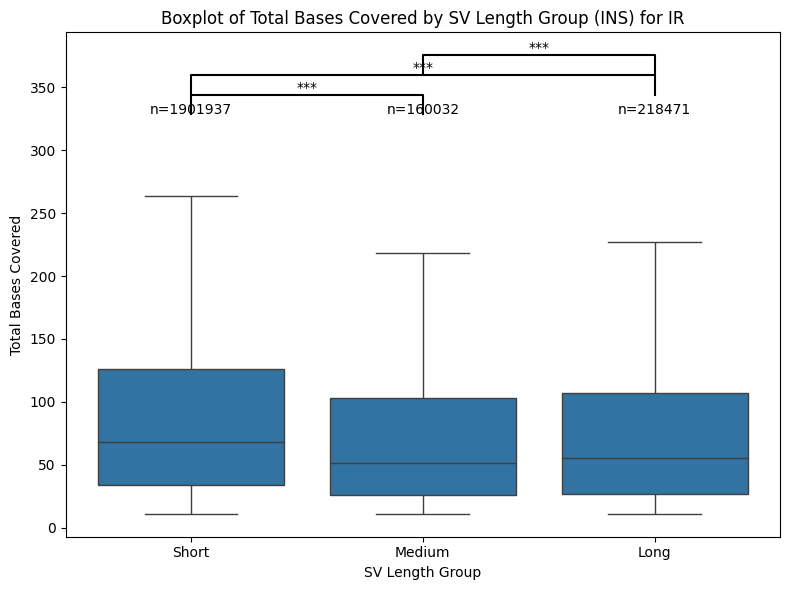


Significance values for DEL (Motif Type: IR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 0.00e+00
Medium vs Long: adjusted p-value = 0.00e+00


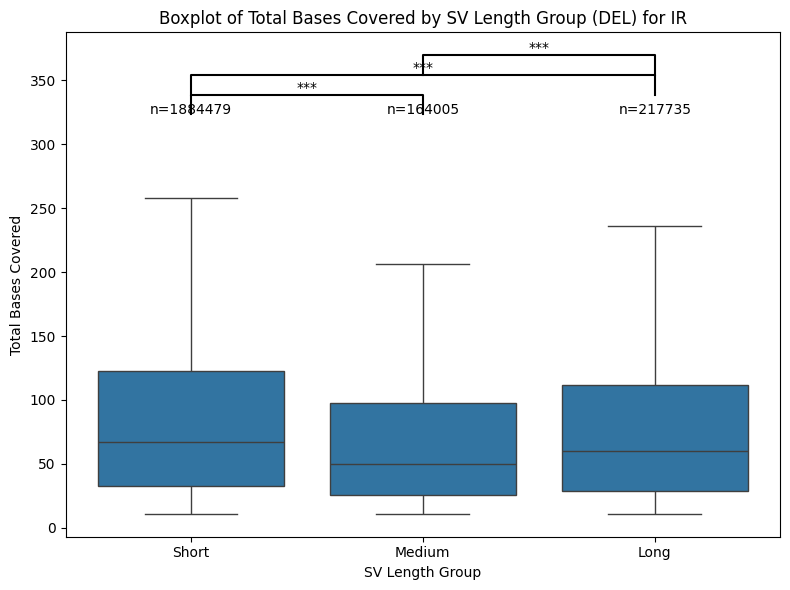


Analyzing data for Motif Type: Z

Significance values for INS (Motif Type: Z):
Short vs Medium: adjusted p-value = 1.59e-01
Short vs Long: adjusted p-value = 1.13e-24
Medium vs Long: adjusted p-value = 4.39e-15


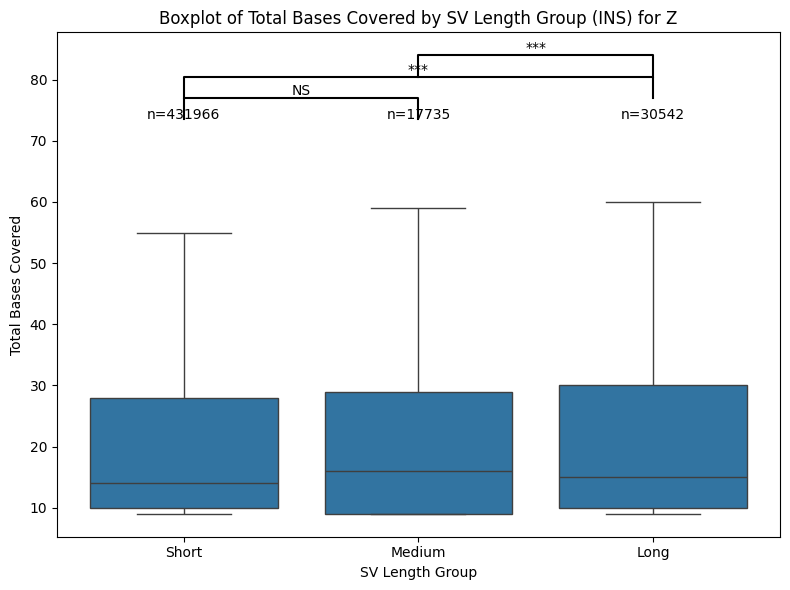


Significance values for DEL (Motif Type: Z):
Short vs Medium: adjusted p-value = 1.42e-16
Short vs Long: adjusted p-value = 2.35e-25
Medium vs Long: adjusted p-value = 4.27e-38


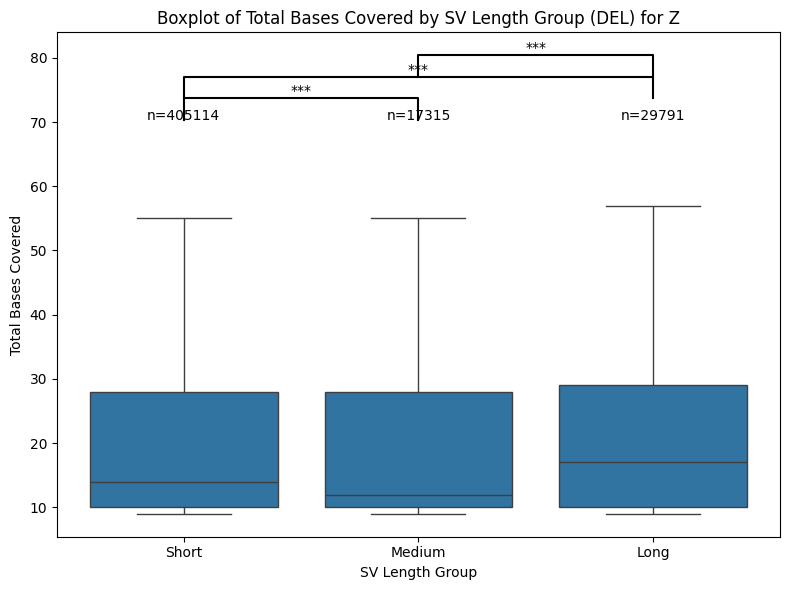


Analyzing data for Motif Type: APR

Significance values for INS (Motif Type: APR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 0.00e+00
Medium vs Long: adjusted p-value = 1.95e-08


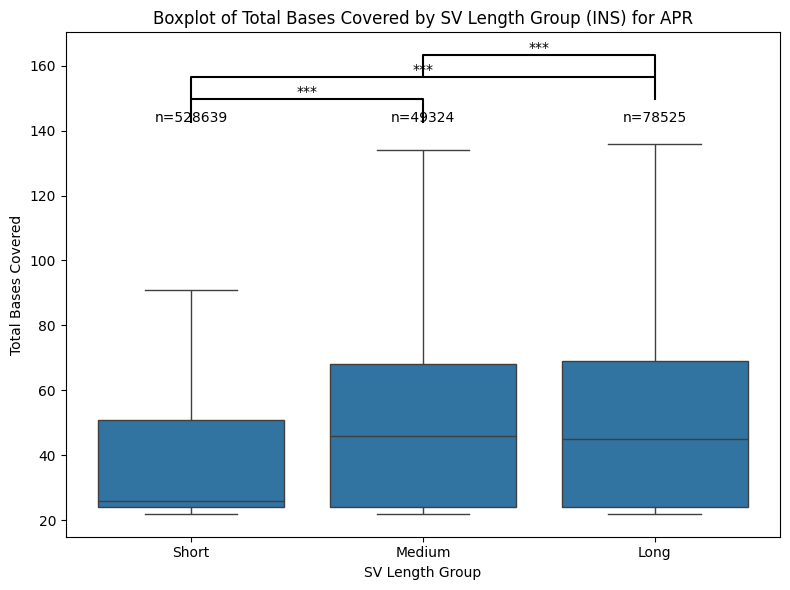


Significance values for DEL (Motif Type: APR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 0.00e+00
Medium vs Long: adjusted p-value = 4.72e-01


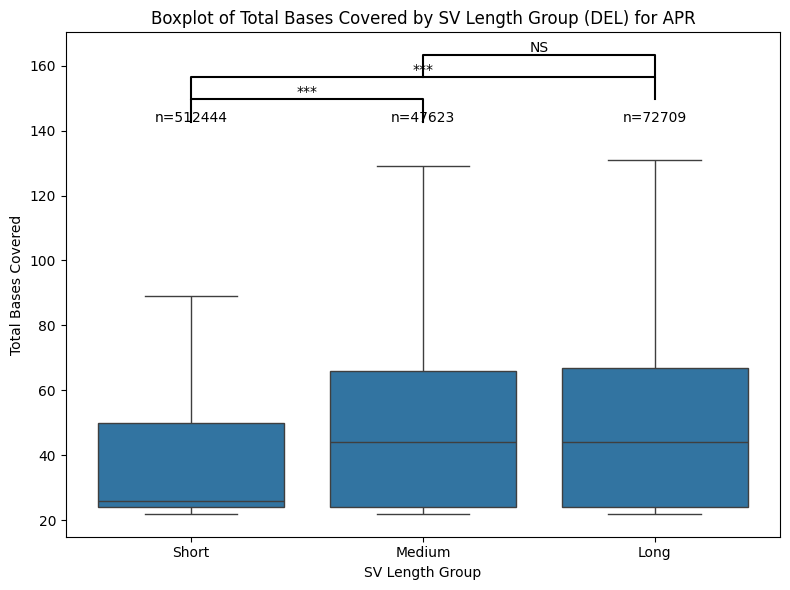


Analyzing data for Motif Type: MR

Significance values for INS (Motif Type: MR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 0.00e+00
Medium vs Long: adjusted p-value = 2.61e-252


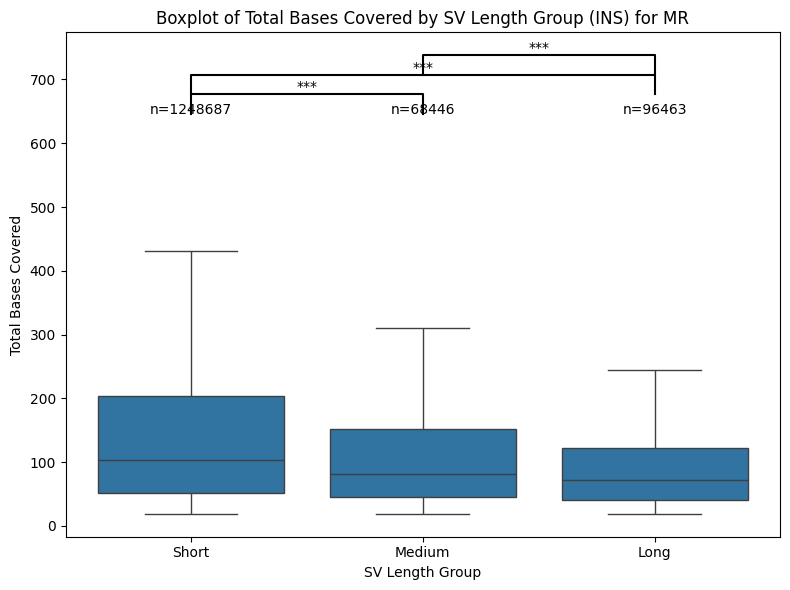


Significance values for DEL (Motif Type: MR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 0.00e+00
Medium vs Long: adjusted p-value = 1.65e-26


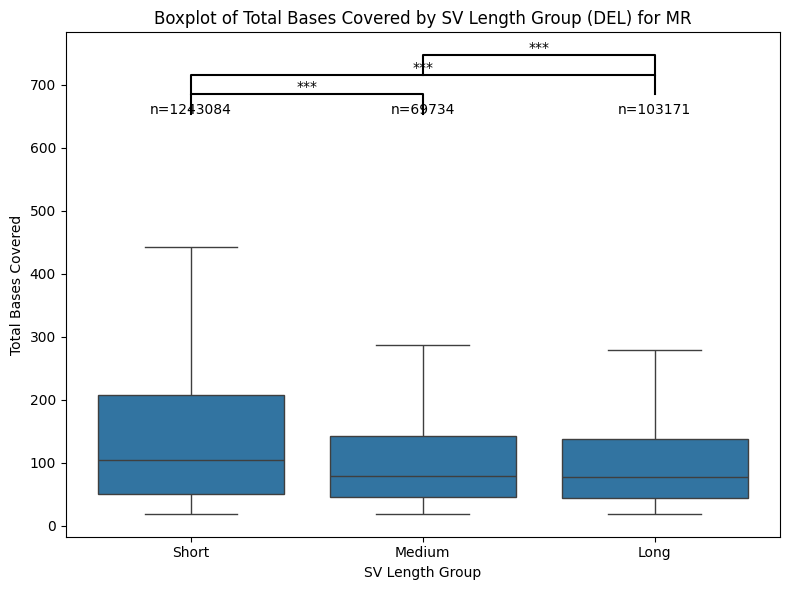


Analyzing data for Motif Type: DR

Significance values for INS (Motif Type: DR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 1.70e-15
Medium vs Long: adjusted p-value = 0.00e+00


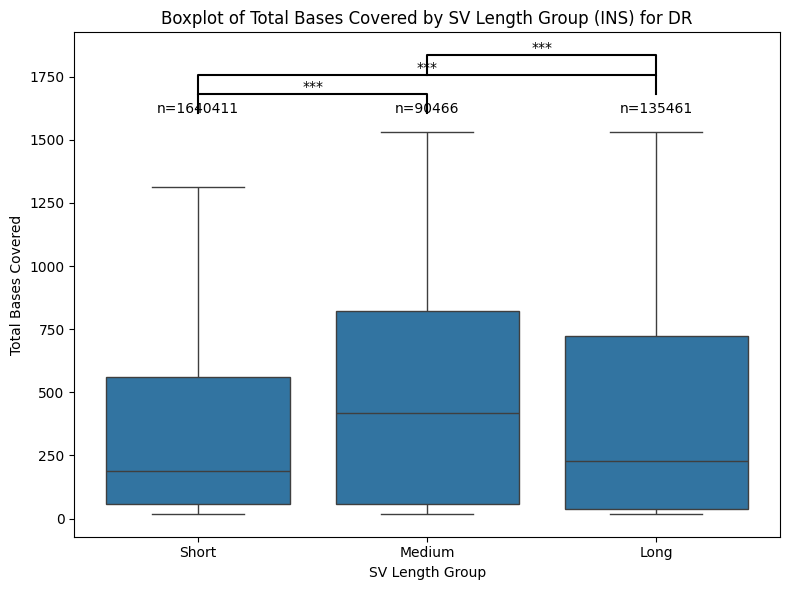


Significance values for DEL (Motif Type: DR):
Short vs Medium: adjusted p-value = 0.00e+00
Short vs Long: adjusted p-value = 3.41e-12
Medium vs Long: adjusted p-value = 0.00e+00


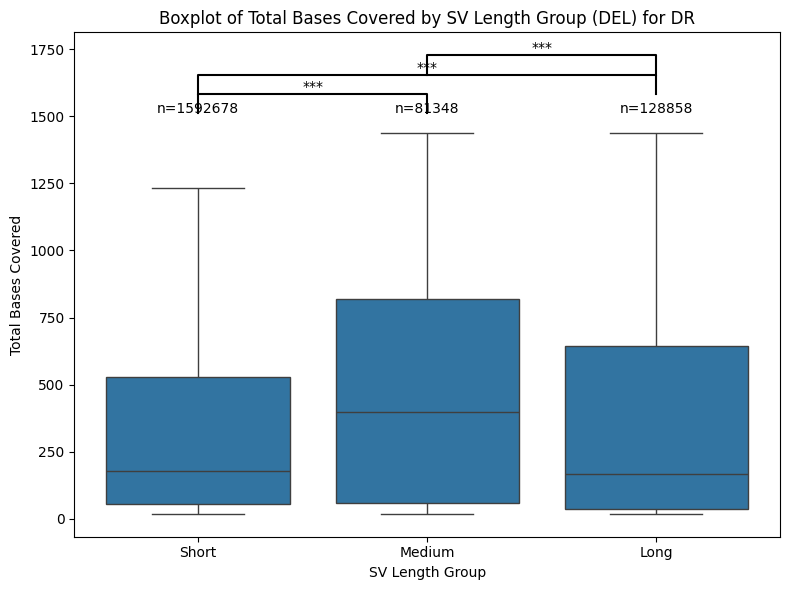

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv')

# Use vectorized string operations to extract SV Length and SV Type
sv_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['SV_Length'] = pd.to_numeric(sv_info[0], errors='coerce')
df['SV_Type'] = sv_info[1]

# Filter out rows with missing SV length, type, or 'Total Bases Covered' less than 1 or greater than 2000
df = df.dropna(subset=['SV_Length', 'SV_Type'])
df = df[(df['Total Bases Covered'] >= 1) & (df['Total Bases Covered'] <= 2000)]

# Define thresholds for short, medium, and long SVs
short_threshold = 1000
medium_threshold = 2000

# Create a new column to categorize SVs into short, medium, and long
df['SV_Length_Group'] = pd.cut(
    df['SV_Length'],
    bins=[0, short_threshold, medium_threshold, df['SV_Length'].max()],
    labels=['Short', 'Medium', 'Long'],
    right=False
)

# Function to remove outliers using the IQR method
def remove_outliers(data):
    Q1 = data['Total Bases Covered'].quantile(0.25)
    Q3 = data['Total Bases Covered'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data['Total Bases Covered'] >= lower_bound) & (data['Total Bases Covered'] <= upper_bound)]

# Function to add significance annotation
def add_significance_annotation(ax, x1, x2, y, h, p_value):
    ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, color='black')
    if p_value < 0.001:
        significance_text = '***'
    elif p_value < 0.01:
        significance_text = '**'
    elif p_value < 0.05:
        significance_text = '*'
    else:
        significance_text = 'NS'
    ax.text((x1 + x2) * 0.5, y + h, significance_text, ha='center', va='bottom', color='black')

# Function to perform pairwise Mann-Whitney U tests and adjust p-values
def perform_statistical_tests(data, categories):
    groups = data.groupby('SV_Length_Group', observed=True)
    p_values = {}
    comparisons = []
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            group1 = groups.get_group(categories[i])['Total Bases Covered']
            group2 = groups.get_group(categories[j])['Total Bases Covered']
            stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
            comparisons.append((categories[i], categories[j]))
            p_values[(categories[i], categories[j])] = p_value
    
    # Adjust p-values using Benjamini-Hochberg correction
    raw_p_values = list(p_values.values())
    _, adjusted_p_values, _, _ = multipletests(raw_p_values, method='fdr_bh')
    
    # Map adjusted p-values back to comparisons
    adjusted_p_values_dict = dict(zip(comparisons, adjusted_p_values))
    return p_values, adjusted_p_values_dict

# Function to create boxplots with adjusted significance annotations
def create_boxplots_with_adjusted_stats(data, sv_type, motif):
    filtered_data = remove_outliers(data)
    categories = ['Short', 'Medium', 'Long']
    
    # Perform tests and adjust p-values
    raw_p_values, adj_p_values = perform_statistical_tests(filtered_data, categories)

    # Print p-values
    print(f"\nSignificance values for {sv_type} (Motif Type: {motif}):")
    for comparison, p_value in adj_p_values.items():
        print(f"{comparison[0]} vs {comparison[1]}: adjusted p-value = {p_value:.2e}")
    
    # Create boxplot
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=filtered_data, x='SV_Length_Group', y='Total Bases Covered', showfliers=False)
    plt.title(f'Boxplot of Total Bases Covered by SV Length Group ({sv_type}) for {motif}')
    plt.xlabel('SV Length Group')
    plt.ylabel('Total Bases Covered')

    # Add counts
    for i, category in enumerate(categories):
        count = len(filtered_data[filtered_data['SV_Length_Group'] == category])
        ax.text(i, filtered_data['Total Bases Covered'].max() * 1.05, f'n={count}', ha='center', fontsize=10)

    # Add significance annotations
    y_max = filtered_data['Total Bases Covered'].max()
    h = 0.05 * y_max
    for idx, ((cat1, cat2), p_value) in enumerate(adj_p_values.items()):
        x1, x2 = categories.index(cat1), categories.index(cat2)
        y = y_max + (idx + 1) * h
        add_significance_annotation(ax, x1, x2, y, h, p_value)

    plt.tight_layout()
    plt.show()

# Analyze data for each motif type
for motif in df['Motif Type'].unique():
    print(f"\nAnalyzing data for Motif Type: {motif}")
    motif_df = df[df['Motif Type'] == motif]
    
    # Analyze for insertions (INS)
    create_boxplots_with_adjusted_stats(motif_df[motif_df['SV_Type'] == 'INS'], 'INS', motif)
    
    # Analyze for deletions (DEL)
    create_boxplots_with_adjusted_stats(motif_df[motif_df['SV_Type'] == 'DEL'], 'DEL', motif)

Top 10 Most Shared SVs by Unique Haplotypes:
                  SV_Identifier  Unique_Haplotypes  Avg_Total_Count_APR  \
780673   chr9_125800515_101_INS                130                  NaN   
183951   chr15_93276038_327_DEL                130                  NaN   
389461     chr1_74874300_63_INS                130             1.000000   
429989  chr20_62719028_1703_INS                130             1.000000   
640248   chr5_126911794_325_DEL                130             1.007752   
383037      chr1_3243990_63_DEL                130             1.000000   
777245     chr8_94851837_62_INS                130                  NaN   
789525     chr9_30301081_95_DEL                130             1.000000   
135568    chr14_53571819_62_DEL                130             1.000000   
778998    chr9_112443782_82_INS                130                  NaN   

        Avg_Total_Count_DR  Avg_Total_Count_IR  Avg_Total_Count_MR  \
780673                 NaN            2.000000            1

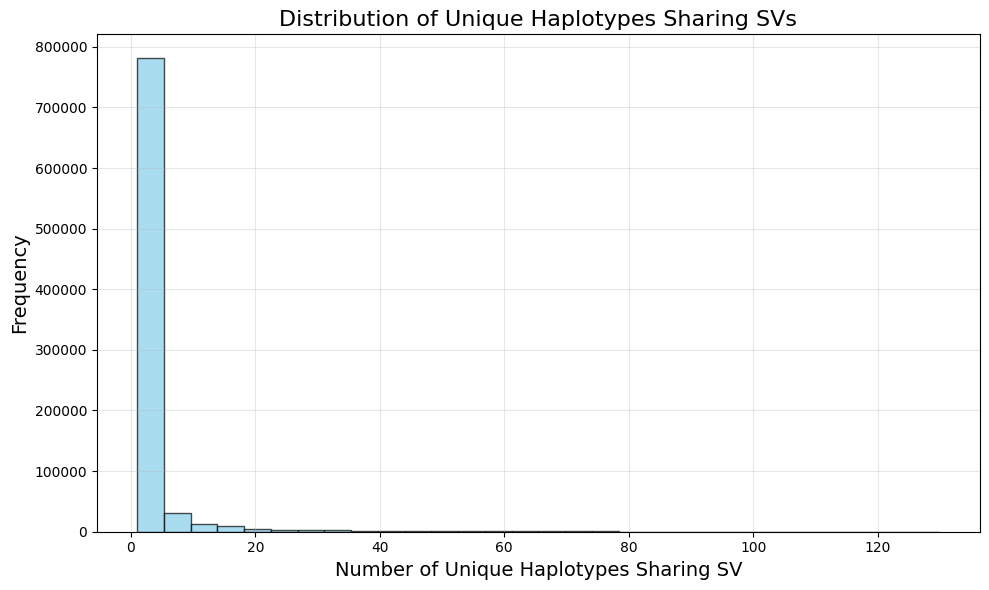

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV data into a pandas DataFrame
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/SVflanks_collapsed_summary_metrics_chr.csv'
df = pd.read_csv(file_path)

# Extract the SV Identifier from the 'Sample_Haplotype_Chromosome' column
df['SV_Identifier'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(chr\d+_\d+_\d+_(INS|DEL))')[0]

# Extract the haplotype identifier (e.g., HG#####_hap# or NA####_hap#)
df['Haplotype_ID'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d+|NA\d+_hap\d+)')[0]

# Count the number of unique haplotypes for each SV Identifier
sv_shared_unique_haplotypes = df.groupby('SV_Identifier')['Haplotype_ID'].nunique().reset_index(name='Unique_Haplotypes')

# Calculate motif-specific averages for Total Count and Total Bases Covered
motif_averages = df.groupby(['SV_Identifier', 'Motif Type']).agg(
    Avg_Total_Count=('Total Count', 'mean'),
    Avg_Total_Bases_Covered=('Total Bases Covered', 'mean')
).reset_index()

# Reshape motif averages into a wide format
motif_averages_wide = motif_averages.pivot(
    index='SV_Identifier', 
    columns='Motif Type', 
    values=['Avg_Total_Count', 'Avg_Total_Bases_Covered']
)

# Flatten the hierarchical column index created by pivot
motif_averages_wide.columns = ['_'.join(col).strip() for col in motif_averages_wide.columns.values]

# Merge motif averages with the unique haplotype counts
sv_shared_data = pd.merge(
    sv_shared_unique_haplotypes, 
    motif_averages_wide, 
    on='SV_Identifier', 
    how='left'
)

# Sort the table by the number of unique haplotypes sharing the SV (descending order)
sv_shared_data = sv_shared_data.sort_values(by='Unique_Haplotypes', ascending=False)

# Display the top 10 most shared SVs by unique haplotypes
print("Top 10 Most Shared SVs by Unique Haplotypes:")
print(sv_shared_data.head(10))

# Save the table to a CSV file
output_path = 'shared_sv_unique_haplotypes_with_motif_averages.csv'
sv_shared_data.to_csv(output_path, index=False)
print(f"Shared SV analysis with motif averages saved to {output_path}")

# Visualize the distribution of unique haplotypes sharing SVs
plt.figure(figsize=(10, 6))
plt.hist(sv_shared_data['Unique_Haplotypes'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Unique Haplotypes Sharing SVs', fontsize=16)
plt.xlabel('Number of Unique Haplotypes Sharing SV', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

Short MEIs | TE Designation: LINE/L1 | Correlation: 0.24
Short MEIs | TE Designation: Retroposon/SVA | Correlation: 0.75
Short MEIs | TE Designation: SINE/Alu | Correlation: -0.40
Medium MEIs | TE Designation: LINE/L1 | Correlation: 0.27
Medium MEIs | TE Designation: Retroposon/SVA | Correlation: -0.12
Long MEIs | TE Designation: LINE/L1 | Correlation: 0.48
Long MEIs | TE Designation: Retroposon/SVA | Correlation: 0.91


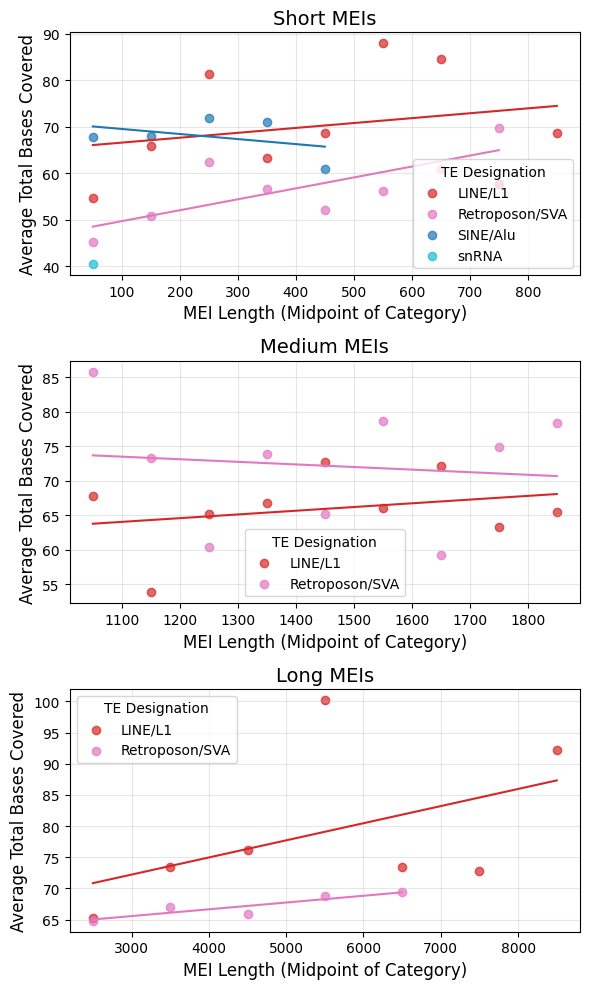

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your MEI data into a pandas DataFrame
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/MEIflanks_collapsed_summary_metrics_chr_with_TE_designations.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Extract MEI Length and MEI Type (INS/DEL) from 'Sample_Haplotype_Chromosome' using regex
mei_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['MEI_Length'] = pd.to_numeric(mei_info[0], errors='coerce')
df['MEI_Type'] = mei_info[1]

# Filter out rows with missing MEI length or 'Total Bases Covered'
df = df.dropna(subset=['MEI_Length', 'Total Bases Covered'])

# Define bins for short, medium, and long MEIs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for te_designations
unique_te_designations = df['te_designation'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_te_designations)))
te_colors = {te: colors[i] for i, te in enumerate(unique_te_designations)}

# Function to create scatter plot for each MEI category
def plot_mei_length_vs_base_coverage(ax, data, bins, title):
    for te_designation, te_data in data.groupby('te_designation'):
        te_data['MEI_Length_Category'] = pd.cut(te_data['MEI_Length'], bins=bins, right=False)
        
        # Compute average total base coverage for each bin
        avg_base_coverage = te_data.groupby('MEI_Length_Category', observed=True)['Total Bases Covered'].mean().reset_index()

        # Calculate bin midpoints
        bin_intervals = avg_base_coverage['MEI_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        avg_base_coverage['MEI_Length_Midpoint'] = bin_midpoints[:len(avg_base_coverage)]

        # Scatter plot the data
        color = te_colors[te_designation]
        ax.scatter(
            avg_base_coverage['MEI_Length_Midpoint'],
            avg_base_coverage['Total Bases Covered'],
            label=te_designation,
            color=color,
            alpha=0.7,
        )

        # Calculate and display regression line and correlation
        if len(avg_base_coverage.dropna()) > 1:
            m, b = np.polyfit(
                avg_base_coverage['MEI_Length_Midpoint'],
                avg_base_coverage['Total Bases Covered'],
                1,
            )
            ax.plot(
                avg_base_coverage['MEI_Length_Midpoint'],
                m * np.array(avg_base_coverage['MEI_Length_Midpoint']) + b,
                color=color,
            )
            corr = np.corrcoef(
                avg_base_coverage['MEI_Length_Midpoint'],
                avg_base_coverage['Total Bases Covered'],
            )[0, 1]
            print(f"{title} | TE Designation: {te_designation} | Correlation: {corr:.2f}")

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('MEI Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Average Total Bases Covered', fontsize=12)
    ax.legend(title='TE Designation', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Filter data and plot for each category
plot_mei_length_vs_base_coverage(
    axes[0], df[df['MEI_Length'] < 1000], bins_short, 'Short MEIs'
)
plot_mei_length_vs_base_coverage(
    axes[1],
    df[(df['MEI_Length'] >= 1000) & (df['MEI_Length'] < 2000)],
    bins_medium,
    'Medium MEIs',
)
plot_mei_length_vs_base_coverage(
    axes[2], df[df['MEI_Length'] >= 2000], bins_long, 'Long MEIs'
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Short MEIs | TE Designation: LINE/L1 | Correlation: 0.39
Short MEIs | TE Designation: Retroposon/SVA | Correlation: -0.03
Short MEIs | TE Designation: SINE/Alu | Correlation: -0.59
Medium MEIs | TE Designation: LINE/L1 | Correlation: 0.48
Medium MEIs | TE Designation: Retroposon/SVA | Correlation: -0.26
Long MEIs | TE Designation: LINE/L1 | Correlation: 0.49
Long MEIs | TE Designation: Retroposon/SVA | Correlation: -0.88


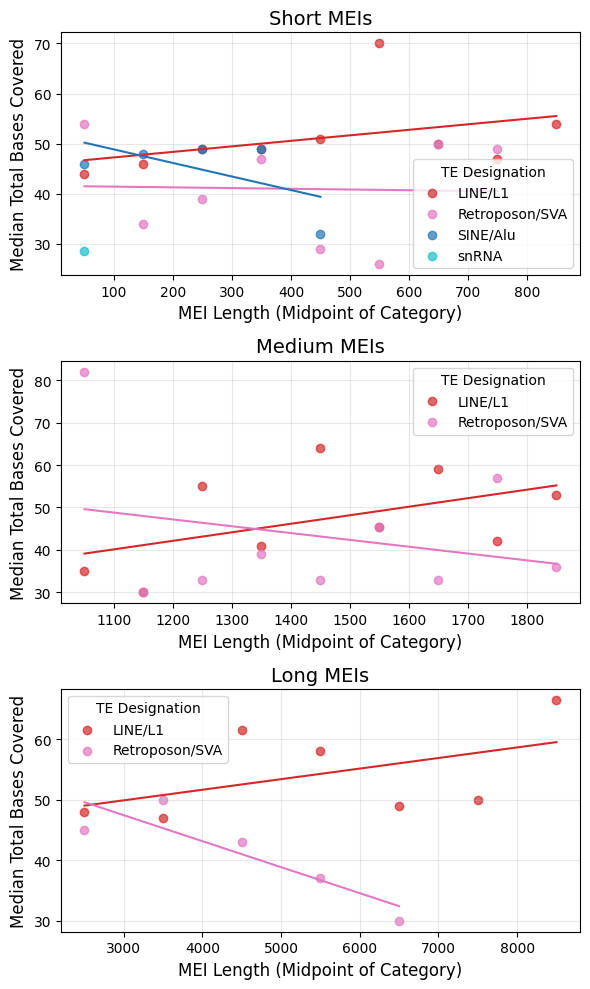

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your MEI data into a pandas DataFrame
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/MEIflanks_collapsed_summary_metrics_chr_with_TE_designations.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Extract MEI Length and MEI Type (INS/DEL) from 'Sample_Haplotype_Chromosome' using regex
mei_info = df['Sample_Haplotype_Chromosome'].str.extract(r'_(\d+)_(INS|DEL)')
df['MEI_Length'] = pd.to_numeric(mei_info[0], errors='coerce')
df['MEI_Type'] = mei_info[1]

# Filter out rows with missing MEI length or 'Total Bases Covered'
df = df.dropna(subset=['MEI_Length', 'Total Bases Covered'])

# Define bins for short, medium, and long MEIs
bins_short = np.arange(0, 1000, 100)
bins_medium = np.arange(1000, 2000, 100)
bins_long = np.arange(2000, 10000, 1000)

# Generate a consistent color palette for te_designations
unique_te_designations = df['te_designation'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_te_designations)))
te_colors = {te: colors[i] for i, te in enumerate(unique_te_designations)}

# Function to create scatter plot for each MEI category
def plot_mei_length_vs_base_coverage(ax, data, bins, title):
    for te_designation, te_data in data.groupby('te_designation'):
        te_data['MEI_Length_Category'] = pd.cut(te_data['MEI_Length'], bins=bins, right=False)
        
        # Compute median total base coverage for each bin
        median_base_coverage = te_data.groupby('MEI_Length_Category', observed=True)['Total Bases Covered'].median().reset_index()

        # Calculate bin midpoints
        bin_intervals = median_base_coverage['MEI_Length_Category'].cat.categories
        bin_midpoints = [(interval.left + interval.right) / 2 for interval in bin_intervals]
        median_base_coverage['MEI_Length_Midpoint'] = bin_midpoints[:len(median_base_coverage)]

        # Scatter plot the data
        color = te_colors[te_designation]
        ax.scatter(
            median_base_coverage['MEI_Length_Midpoint'],
            median_base_coverage['Total Bases Covered'],
            label=te_designation,
            color=color,
            alpha=0.7,
        )

        # Calculate and display regression line and correlation
        if len(median_base_coverage.dropna()) > 1:
            m, b = np.polyfit(
                median_base_coverage['MEI_Length_Midpoint'],
                median_base_coverage['Total Bases Covered'],
                1,
            )
            ax.plot(
                median_base_coverage['MEI_Length_Midpoint'],
                m * np.array(median_base_coverage['MEI_Length_Midpoint']) + b,
                color=color,
            )
            corr = np.corrcoef(
                median_base_coverage['MEI_Length_Midpoint'],
                median_base_coverage['Total Bases Covered'],
            )[0, 1]
            print(f"{title} | TE Designation: {te_designation} | Correlation: {corr:.2f}")

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('MEI Length (Midpoint of Category)', fontsize=12)
    ax.set_ylabel('Median Total Bases Covered', fontsize=12)
    ax.legend(title='TE Designation', fontsize=10)
    ax.grid(visible=True, alpha=0.3)

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Filter data and plot for each category
plot_mei_length_vs_base_coverage(
    axes[0], df[df['MEI_Length'] < 1000], bins_short, 'Short MEIs'
)
plot_mei_length_vs_base_coverage(
    axes[1],
    df[(df['MEI_Length'] >= 1000) & (df['MEI_Length'] < 2000)],
    bins_medium,
    'Medium MEIs',
)
plot_mei_length_vs_base_coverage(
    axes[2], df[df['MEI_Length'] >= 2000], bins_long, 'Long MEIs'
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()